<a href="https://colab.research.google.com/github/RushiG02/ML/blob/master/sih_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fbprophet import Prophet
import pandas as pd

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/vmali007/sih/master/pdata_new.csv")
df.head()

,Unnamed: 0,tsp,actual_load,forecast,solar,wind
0,0,2014-01-01T00:00:00Z,61290,60250,1,3292
1,1,2014-01-01T01:00:00Z,60498,59400,1,3276
2,2,2014-01-01T02:00:00Z,57154,55700,1,3258
3,3,2014-01-01T03:00:00Z,53950,52650,1,3398
4,4,2014-01-01T04:00:00Z,52546,51300,1,3630


In [0]:
df["tsp"] = pd.to_datetime(df["tsp"])
df['tsp'] = df['tsp'].dt.tz_convert(None)

In [0]:
df.head()

,Unnamed: 0,tsp,actual_load,forecast,solar,wind
0,0,2014-01-01 00:00:00,61290,60250,1,3292
1,1,2014-01-01 01:00:00,60498,59400,1,3276
2,2,2014-01-01 02:00:00,57154,55700,1,3258
3,3,2014-01-01 03:00:00,53950,52650,1,3398
4,4,2014-01-01 04:00:00,52546,51300,1,3630


Unnamed: 0              int64
tsp            datetime64[ns]
actual_load             int64
forecast                int64
solar                   int64
wind                    int64
dtype: object

In [0]:
df1 = df[["tsp","wind"]]

In [0]:
df1 = df1.rename(columns={"tsp": "ds", "wind": "y"})

In [0]:
df1.head()

,ds,y
0,2014-01-01 00:00:00,3292
1,2014-01-01 01:00:00,3276
2,2014-01-01 02:00:00,3258
3,2014-01-01 03:00:00,3398
4,2014-01-01 04:00:00,3630


In [0]:
A = Prophet()
A.fit(df1)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [0]:
future = A.make_future_dataframe(periods=8784,freq="H")
future.tail()

,ds
54761,2020-03-31 17:00:00
54762,2020-03-31 18:00:00
54763,2020-03-31 19:00:00
54764,2020-03-31 20:00:00
54765,2020-03-31 21:00:00


In [0]:
forecast1 = A.predict(future)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
54761,2020-03-31 17:00:00,4226.703062,1355.098077,7265.147725
54762,2020-03-31 18:00:00,4253.279201,1210.864292,7275.968499
54763,2020-03-31 19:00:00,4302.832899,1323.658482,7171.471486
54764,2020-03-31 20:00:00,4357.678237,1215.480886,7470.738711
54765,2020-03-31 21:00:00,4395.114926,1473.313549,7364.190608


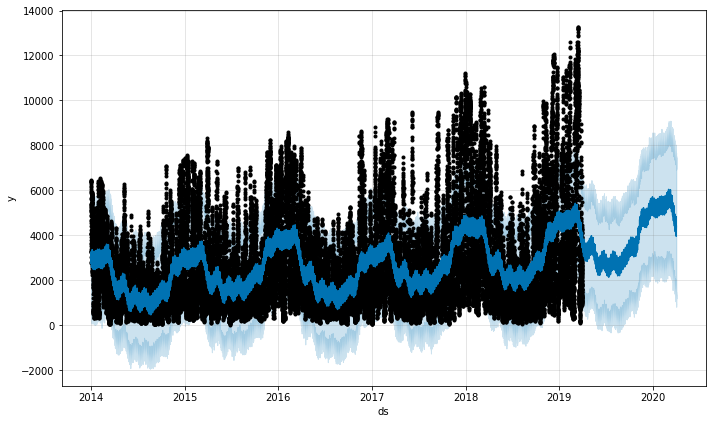

In [0]:
fig1 = A.plot(forecast1)

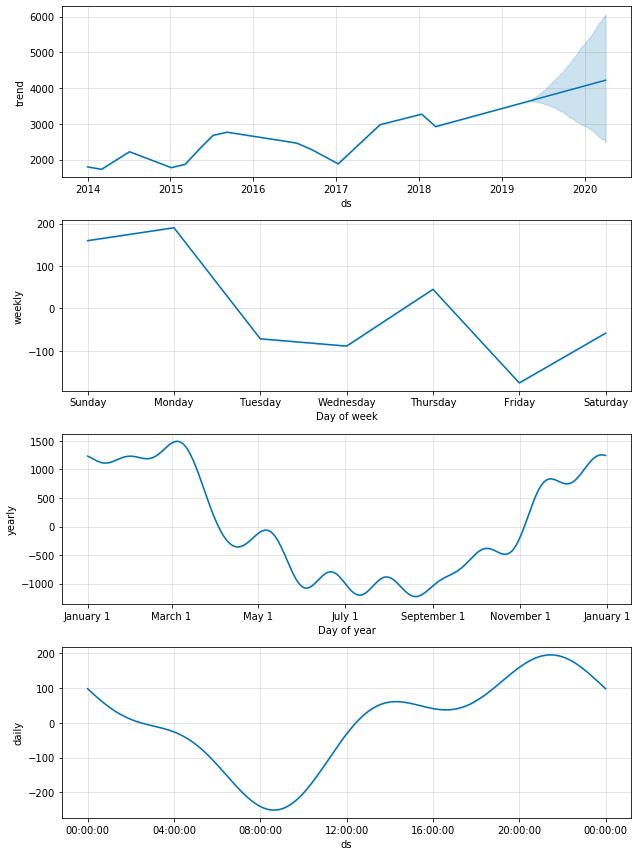

In [0]:
fig2 = A.plot_components(forecast1)


In [0]:
forecast1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01 00:00:00,1795.176406,712.894815,5452.161329,1795.176406,1795.176406,1245.979132,1245.979132,1245.979132,98.045886,98.045886,98.045886,-88.852748,-88.852748,-88.852748,1236.785994,1236.785994,1236.785994,0.0,0.0,0.0,3041.155538
1,2014-01-01 01:00:00,1795.129767,690.702350,5428.373013,1795.129767,1795.129767,1202.485177,1202.485177,1202.485177,45.186324,45.186324,45.186324,-79.072303,-79.072303,-79.072303,1236.371156,1236.371156,1236.371156,0.0,0.0,0.0,2997.614944
2,2014-01-01 02:00:00,1795.083128,441.257096,5273.611999,1795.083128,1795.083128,1177.030200,1177.030200,1177.030200,10.054930,10.054930,10.054930,-68.977675,-68.977675,-68.977675,1235.952944,1235.952944,1235.952944,0.0,0.0,0.0,2972.113328
3,2014-01-01 03:00:00,1795.036490,692.279749,5374.853614,1795.036490,1795.036490,1168.450232,1168.450232,1168.450232,-8.409966,-8.409966,-8.409966,-58.671195,-58.671195,-58.671195,1235.531394,1235.531394,1235.531394,0.0,0.0,0.0,2963.486722
4,2014-01-01 04:00:00,1794.989851,626.503612,5319.441708,1794.989851,1794.989851,1160.783167,1160.783167,1160.783167,-26.066145,-26.066145,-26.066145,-48.257227,-48.257227,-48.257227,1235.106539,1235.106539,1235.106539,0.0,0.0,0.0,2955.773018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54761,2020-03-31 17:00:00,4221.112258,1355.098077,7265.147725,2485.900307,6068.841695,5.590804,5.590804,5.590804,39.289085,39.289085,39.289085,-140.779138,-140.779138,-140.779138,107.080856,107.080856,107.080856,0.0,0.0,0.0,4226.703062
54762,2020-03-31 18:00:00,4221.184483,1210.864292,7275.968499,2486.021038,6069.256175,32.094718,32.094718,32.094718,63.119785,63.119785,63.119785,-135.699360,-135.699360,-135.699360,104.674293,104.674293,104.674293,0.0,0.0,0.0,4253.279201
54763,2020-03-31 19:00:00,4221.256707,1323.658482,7171.471486,2486.141768,6069.670655,81.576191,81.576191,81.576191,109.025288,109.025288,109.025288,-129.721977,-129.721977,-129.721977,102.272881,102.272881,102.272881,0.0,0.0,0.0,4302.832899
54764,2020-03-31 20:00:00,4221.328932,1215.480886,7470.738711,2486.262499,6070.085135,136.349305,136.349305,136.349305,159.383191,159.383191,159.383191,-122.910519,-122.910519,-122.910519,99.876634,99.876634,99.876634,0.0,0.0,0.0,4357.678237


In [0]:
forecast.to_csv(path_or_buf="/content/wind.csv")

In [0]:
forecast.shape

(54766, 22)

In [0]:
df2 = df[["tsp","solar"]]
df3 = df[["tsp","actual_load"]]
df4 = df[["tsp","forecast"]]


In [0]:
df2 = df2.rename(columns={"tsp": "ds", "solar": "y"})
df3 = df3.rename(columns={"tsp": "ds", "actual_load": "y"})
df4 = df4.rename(columns={"tsp": "ds", "forecast": "y"})

In [0]:
B = Prophet()
C = Prophet()
D = Prophet()

B.fit(df2)
C.fit(df3)
D.fit(df4)

In [0]:
forecast2 = B.predict(future)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
54761,2020-03-31 17:00:00,1334.053984,178.174247,2504.957029
54762,2020-03-31 18:00:00,965.119443,-271.130270,2168.454526
54763,2020-03-31 19:00:00,832.868115,-324.896731,2006.901667
54764,2020-03-31 20:00:00,847.047945,-307.895313,1995.760551
54765,2020-03-31 21:00:00,883.840728,-232.810236,1973.087365


In [0]:
forecast3 = C.predict(future)
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
54761,2020-03-31 17:00:00,49489.709145,-16850.988615,114905.449268
54762,2020-03-31 18:00:00,50188.172871,-15763.025539,115553.600169
54763,2020-03-31 19:00:00,49723.485541,-17927.739465,114156.616932
54764,2020-03-31 20:00:00,48565.225435,-18734.259862,114333.191268
54765,2020-03-31 21:00:00,47463.543610,-20072.221752,113228.512141


In [0]:
forecast4 = D.predict(future)
forecast4[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
54761,2020-03-31 17:00:00,49238.136288,-15471.321376,113077.331993
54762,2020-03-31 18:00:00,50008.619438,-14239.144740,113396.635109
54763,2020-03-31 19:00:00,49539.700290,-13966.820288,114483.088164
54764,2020-03-31 20:00:00,48364.920552,-14183.657935,113199.852079
54765,2020-03-31 21:00:00,47295.371374,-17111.622750,113055.493589


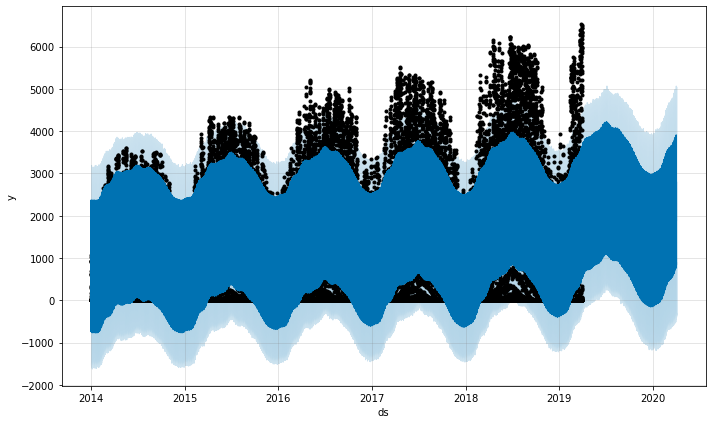

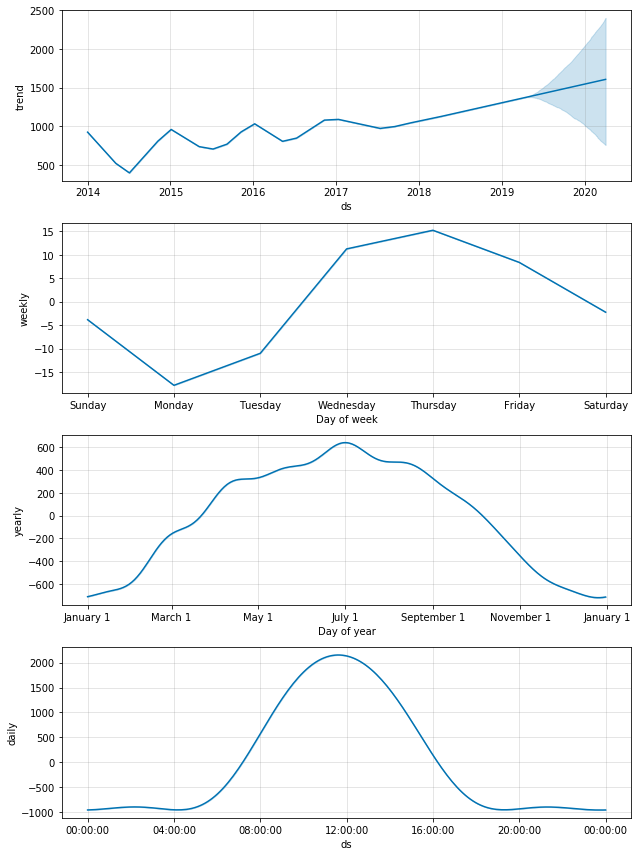

In [0]:
fig3 = B.plot(forecast2)
fig4 = B.plot_components(forecast2)

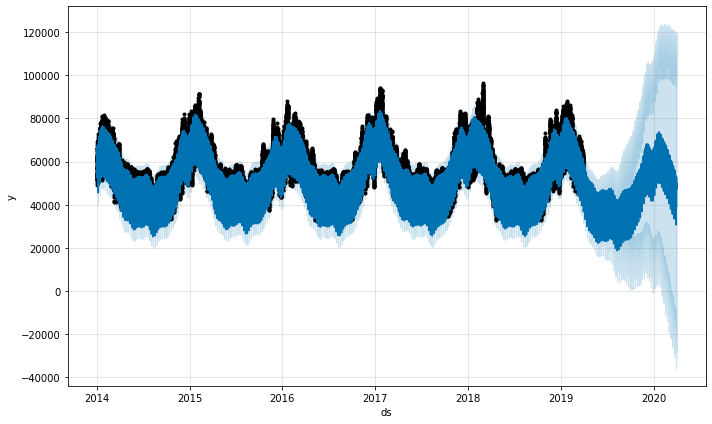

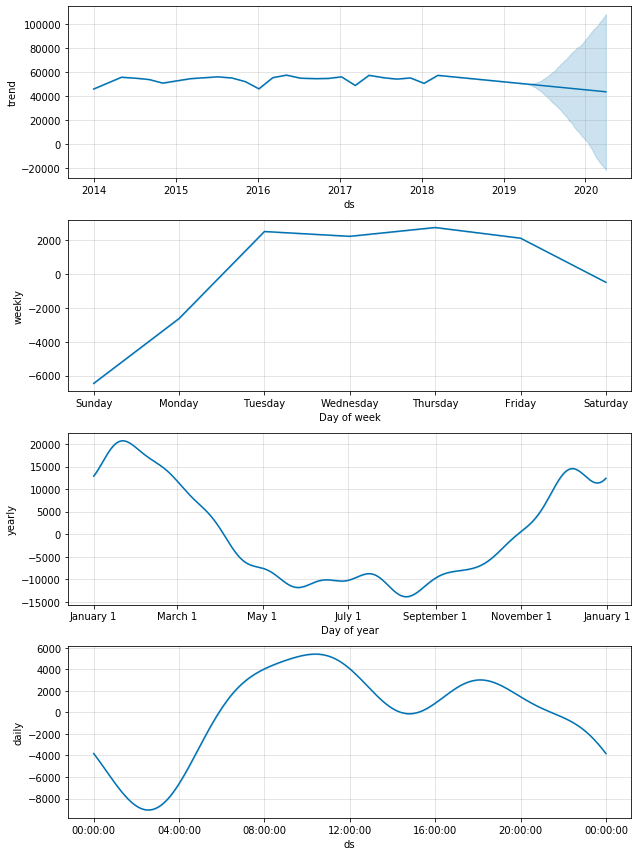

In [0]:
fig = C.plot(forecast3)
fig4 = C.plot_components(forecast3)

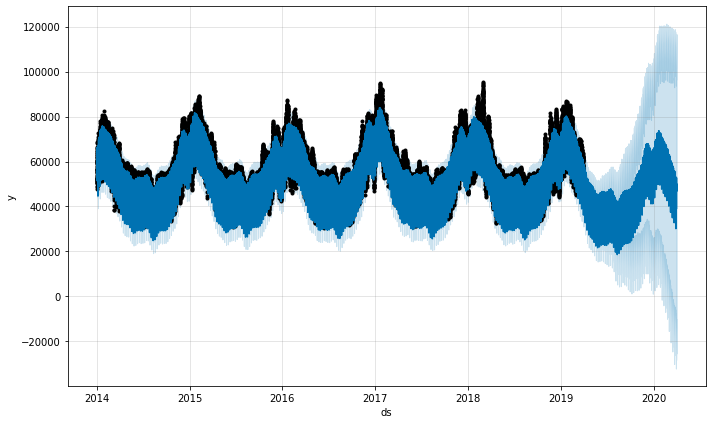

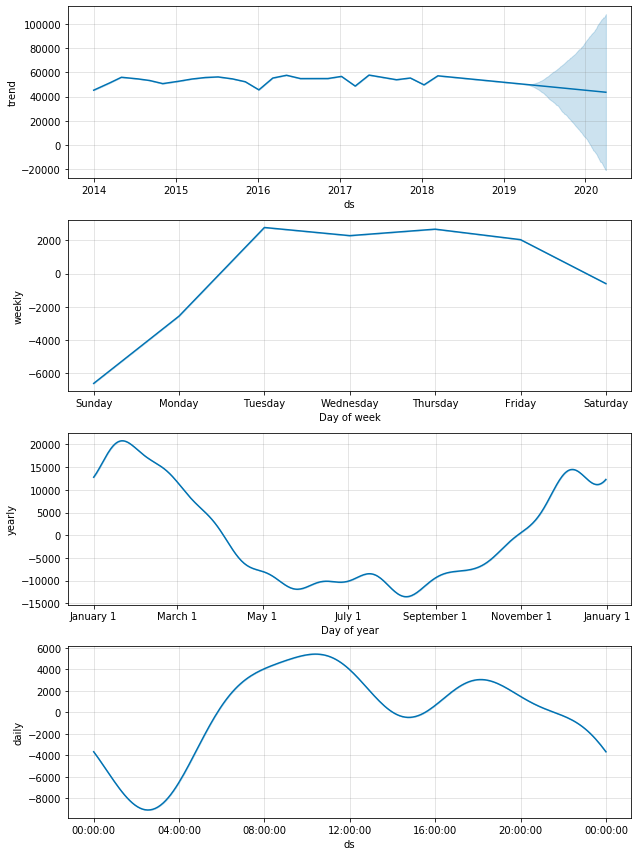

In [0]:
fig3 = D.plot(forecast4)
fig4 = D.plot_components(forecast4)

In [0]:
forecast2.to_csv(path_or_buf="/content/solar_energy_generated.csv")

In [0]:
forecast3.to_csv(path_or_buf="/content/actual_load.csv")
forecast4.to_csv(path_or_buf="/content/forecasted_load.csv")